<a href="https://colab.research.google.com/github/FaatihFath/Praktikum-Mandiri-ML/blob/main/Praktikum5_Mandiri_Faatih_Fathan_Hafizh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Praktikum Machine Learning/Praktikum 5'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv(path+'/Notebook/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Cek missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
# Cek Duplikasi
df.duplicated().sum()


np.int64(0)

Mempersiapkan Data

In [9]:

# Encoding data
df['Species'] = df['Species'].astype('category').cat.codes

X_iris = df.drop('Species', axis = 1)
y_iris = df['Species']

#Membagi data Training dan testing

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris,
    y_iris,
    test_size=0.2,
    random_state=42,
    stratify = y_iris)

print("Ukuran Data Latih", X_train_iris.shape, y_train_iris.shape)
print("Ukuran Data Uji", X_test_iris.shape, y_test_iris.shape)

Ukuran Data Latih (120, 5) (120,)
Ukuran Data Uji (30, 5) (30,)


Membuat Model Decission Tree

In [12]:
# membangun Model Decission Tree
dt_iris = DecisionTreeClassifier(random_state=42)
dt_iris.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(random_state=42)

Evaluasi Model

In [13]:
# Prediksi
y_pred_iris = dt_iris.predict(X_test_iris)

# Kalkulasi
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print("Akurasi Model Decission Tree pada data uji Iris:", round(accuracy_iris * 100, 2), "%")

# Konfusion Matrix
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("Konfusion Matrix:")
print(conf_matrix_iris)

# Classification Report
class_report_iris = classification_report(y_test_iris, y_pred_iris, target_names = ['setosa', 'versicolor','virginica'])
print("\nClassification Report:")
print(class_report_iris)


Akurasi Model Decission Tree pada data uji Iris: 100.0 %
Konfusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Visualisasi Model

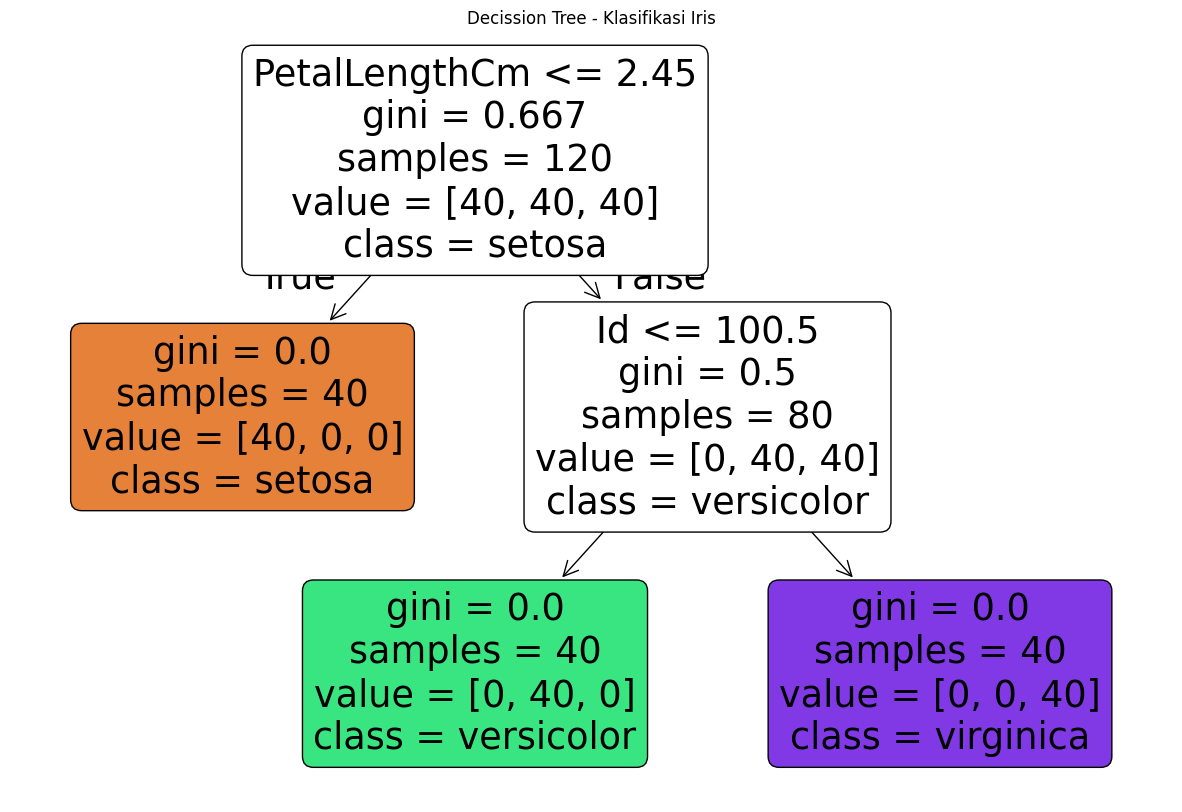

In [14]:
# Visualisasi Model Decission Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_iris, feature_names=X_iris.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True)
plt.title("Decission Tree - Klasifikasi Iris")
plt.show()

Melihat Fitur Penting

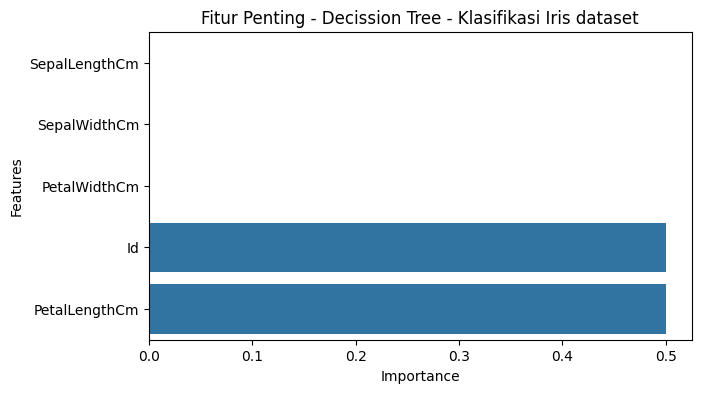

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalWidthCm     0.0
Id               0.5
PetalLengthCm    0.5
dtype: float64


In [ ]:
# Fitur Importance
imp_iris = pd.Series(dt_iris.feature_importances_, index=X_iris.columns).sort_values(ascending=True)

#Buat Bar Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=imp_iris, y=imp_iris.index)
plt.title("Fitur Penting - Decission Tree - Klasifikasi Iris dataset")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

print(imp_iris)


HyperParamater Tuning

In [ ]:
# Lakukan iterasi untuk nilai max_depth dari 1 hingga 10
scores_iris = {}
for d in range(1, 11):
  # Buat model DecisionTreeClassifier baru
  m_iris = DecisionTreeClassifier(max_depth=d, random_state=42)

  # Latih model menggunakan data latih
  m_iris.fit(X_train_iris, y_train_iris)

  # Prediksi label pada data uji
  y_pred_iris_tuned = m_iris.predict(X_test_iris)

  # Hitung akurasi model pada data uji
  accuracy_iris_tuned = accuracy_score(y_test_iris, y_pred_iris_tuned)

  # Simpan nilai akurasi
  scores_iris[d] = accuracy_iris_tuned

# Identifikasi max_depth dengan akurasi tertinggi
best_d_iris = max(scores_iris, key=scores_iris.get)

# Cetak max_depth terbaik beserta nilai akurasinya
print(f"Max_depth terbaik untuk dataset Iris: {best_d_iris} | Akurasi: {round(scores_iris[best_d_iris]*100, 2)} %")

Max_depth terbaik untuk dataset Iris: 2 | Akurasi: 100.0 %
